In [4]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [5]:
def getDistance(x1, x2, y1, y2):
    result = math.sqrt((x2 -x1)**2 + (y2 - y1)**2)
    return(result)

In [6]:
average_distance = []
keep_distance = []
average_number_of_persons = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):    
    if "txt" in filename and "geo" not in filename:
        df = get_whole_df(filename, 5, 5)
        selectID = df
#         average_persons = get_average_person_number(filename, df["frame_x"].unique())
#         print(average_persons)
#         average_number_of_persons.append(average_persons)
        #Alle Abstände berechnen die in Fläche liegen
        all_frames = []
        borderDistance = []
        selectIDBorder = selectID
        for gruppe in selectIDBorder["GroupID"].unique():
            selectGroup = selectIDBorder.loc[selectIDBorder["GroupID"] == gruppe, ["id", "frame_x", "x/m", "y/m_x"]]
            for frame in selectGroup["frame_x"].unique():
                selectFrame = selectGroup.loc[selectGroup["frame_x"] == frame]
                #plt.scatter(selectFrame["x/m"], selectFrame["y/m_x"])
                #plotBahnsteig()
                for contact in itertools.combinations(selectFrame["id"], 2):
                    all_frames.append(frame)
                    firstPosition = selectFrame.loc[selectFrame["id"] == contact[0], ["x/m", "y/m_x"]]
                    secondPosition = selectFrame.loc[selectFrame["id"] == contact[1], ["x/m", "y/m_x"]]
                    distanz = getDistance(x1 = float(firstPosition["x/m"]), x2 = float(secondPosition["x/m"]), y1 = float(firstPosition["y/m_x"]), y2 = float(secondPosition["y/m_x"]))
                    borderDistance.append(distanz)
                    
        ave_bahnsteiger = get_average_person_number(filename, all_frames)
        average_number_of_persons.append(ave_bahnsteiger)
        print(ave_bahnsteiger)
        ave_distance = statistics.mean(borderDistance)
        average_distance.append(ave_distance)
        #Anzahl an Verletzungen des Mindestabstands
        verletzungen = len([i for i in borderDistance if i < 1.5]) / len(borderDistance)
        eingehalten = len([i for i in borderDistance if i > 1.5]) / len(borderDistance)
        keep_distance.append(eingehalten)
    

ZHDB_0205_6_20.txt
47.50486809045226
ZHDB_0212_6_20.txt
43.74564697849095
ZHDB_0219_6_20.txt
45.43086642599278
ZHDB_0226_6_20.txt
53.2890395480226
ZHDB_0304_6_20.txt
45.16318252730109
ZHDB_0311_6_20.txt
43.877912543887646
ZHDB_0318_6_20.txt
21.275563909774437
ZHDB_0325_6_20.txt
16.779141104294478
ZHDB_0401_6_20.txt
19.600709219858157
ZHDB_0408_6_20.txt
20.278022947925862
ZHDB_0415_6_20.txt
19.821571238348866
ZHDB_0422_6_20.txt
20.38955139125497
ZHDB_0429_6_20.txt
20.020712209302324
ZHDB_0506_6_20.txt
21.727206946454412
ZHDB_0513_6_20.txt
26.554232804232804
ZHDB_0520_6_20.txt
29.031858028650845
ZHDB_0527_6_20.txt
31.311519497982967
ZHDB_0603_6_20.txt
30.77525071633238
ZHDB_0610_6_20.txt
32.085363398429635
ZHDB_0617_6_20.txt
34.106646353075604
ZHDB_0624_6_20.txt
37.85112732095491
ZHDB_0701_6_20.txt
33.43844731977819
ZHDB_0708_6_20.txt
38.195925803246105
ZHDB_0715_6_20.txt
32.05002989834563
ZHDB_0722_6_20.txt
32.89571290944124
ZHDB_0729_6_20.txt
31.585909003647533
ZHDB_0805_6_20.txt
33.04

In [7]:
average_number_of_persons

[47.50486809045226,
 43.74564697849095,
 45.43086642599278,
 53.2890395480226,
 45.16318252730109,
 43.877912543887646,
 21.275563909774437,
 16.779141104294478,
 19.600709219858157,
 20.278022947925862,
 19.821571238348866,
 20.38955139125497,
 20.020712209302324,
 21.727206946454412,
 26.554232804232804,
 29.031858028650845,
 31.311519497982967,
 30.77525071633238,
 32.085363398429635,
 34.106646353075604,
 37.85112732095491,
 33.43844731977819,
 38.195925803246105,
 32.05002989834563,
 32.89571290944124,
 31.585909003647533,
 33.045300113250285,
 34.25737359550562,
 41.09584880188998,
 38.640755230481375]

In [8]:
#Korrelation mit rel. Häufigkeit wie Abstand eingehalten wurde
print(np.corrcoef(keep_distance, average_number_of_persons)[0, 1])
#https://www.medistat.de/glossar/korrelation-assoziation/korrelationskoeffizient-nach-pearson/#:~:text=Interpretation%3A,%2C%20wenn%20r%20%3D%200%20ist.


-0.8435224634404563


In [9]:
#Korrelation durchschnitlichem Abstand
print(np.corrcoef(average_distance, average_number_of_persons)[0, 1])

-0.5866411795508131


In [10]:
average_number_of_persons = np.array(average_number_of_persons)
slope, intercept, r_value, p_value, std_err = linregress(average_number_of_persons,average_distance)

In [11]:
plt.rcParams["font.family"] = "Microsoft Yi Baiti"

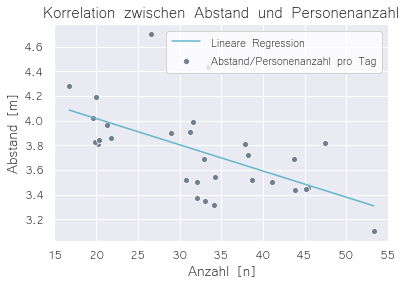

In [15]:
sb.set()
sb.scatterplot(average_number_of_persons, average_distance, color = "slategrey", label = "Abstand/Personenanzahl pro Tag")
sb.lineplot(average_number_of_persons, intercept + slope*average_number_of_persons, color = "c", label = "Lineare Regression")
plt.xlabel("Anzahl [n]", fontsize = 18,fontname="Microsoft Yi Baiti")
plt.xticks(fontsize = 16,fontname="Microsoft Yi Baiti")
plt.ylabel("Abstand [m]", fontsize = 18,fontname="Microsoft Yi Baiti")
plt.yticks(fontsize = 16,fontname="Microsoft Yi Baiti")
plt.title("Korrelation zwischen Abstand und Personenanzahl", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.legend(facecolor = "white", fontsize = 14, prop={'family':"Microsoft Yi Baiti", 'size':14})
plt.savefig(r"Korrelationsplots\Korrelation 5er Traube außerhalb Einstiegsfläche", dpi = 200)

In [13]:
from scipy.stats import pearsonr
pearsonr(average_distance, average_number_of_persons)

(-0.5866411795508132, 0.0006562086616581043)